<a href="https://colab.research.google.com/github/Subhraj07/Machine_Learning_Models/blob/master/MLpractice/STOCK/STOCK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import urllib.request
import json
import time

data_infy = {}
data_tcs = {}
lsave = time.time()


def autoSave():
    global lsave
    curr_time = time.time()
    if curr_time >= lsave + 300:
        with open('infy', 'a+') as f:
            f.write(str(data_infy))
        with open('tcs', 'a+') as f:
            f.write(str(data_tcs))
        lsave = time.time()
        combiner()
        print("AutoSaved at : " + time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(lsave)))


def import_web(ticker):
    """
    :param ticker: Takes the company ticker
    :return: Returns the HTML of the page
    """
    url = 'https://www.nseindia.com/live_market/dynaContent/live_watch/get_quote/GetQuote.jsp?symbol=' + ticker + '&illiquid=0&smeFlag=0&itpFlag=0'
    print(url)
    req = urllib.request.Request(url, headers={'User-Agent': "Chrome Browser"})
    fp = urllib.request.urlopen(req, timeout=10)
    mybytes = fp.read()
    mystr = mybytes.decode("utf8")
    fp.close()
    return mystr


def get_quote(ticker):
    """
    :param ticker: Takes the company ticker
    :return: None
    """
    ticker = ticker.upper()
    try:
        """fetches a UTF-8-encoded web page, and  extract some text from the HTML"""
        string_html = import_web(ticker)
        get_data(filter_data(string_html), ticker)
    except Exception as e:
        print(e)


def filter_data(string_html):
    searchString = '<div id="responseDiv" style="display:none">'
    # assign: stores html tag to find where data starts
    searchString2 = '</div>'
    # stores:  stores html tag where  data end
    sta = string_html.find(searchString)
    # returns & store: find() method returns the lowest index of the substring (if found). If not found, it returns -1.
    data = string_html[sta + 43:]
    # returns & stores: skips 43 characters and stores the index of substring
    end = data.find(searchString2)
    # returns & store: find() method returns the lowest index of the substring (if found). If not found, it returns -1.
    fdata = data[:end]
    # fetch: stores the fetched data into fdata
    stripped = fdata.strip()
    # removes: blank spaces
    return stripped


def get_data(stripped, company):
    js = json.loads(stripped)
    datajs = js['data'][0]
    subdictionary = {}
    subdictionary['1. open'] = datajs['open']
    subdictionary['2. high'] = datajs['dayHigh']
    subdictionary['3. low'] = datajs['dayLow']
    subdictionary['4. close'] = datajs['lastPrice']
    subdictionary['5. volume'] = datajs['totalTradedVolume']
    if company == 'INFY':
        print(
            'Adding value at : ',
            js['lastUpdateTime'],
            ' to ',
            company,
            ' Price:',
            datajs["lastPrice"],
        )
        data_infy[js['lastUpdateTime']] = subdictionary
    elif company == 'TCS':
        print(
            'Adding value at : ',
            js['lastUpdateTime'],
            ' to ',
            company,
            ' Price:',
            datajs["lastPrice"],
        )
        data_tcs[js['lastUpdateTime']] = subdictionary


def combiner():
    file_names = ['infy', 'tcs']

    for ticker in file_names:
        final = {}

        with open(ticker, 'r') as f:
            data = f.read()
        data = data.replace("}{", "}split{")
        splittedData = data.split('split')

        for dictionary in splittedData:
            tmp = json.loads(dictionary.replace("'", '"'))
            for key in tmp.keys():
                final[key] = tmp[key]

        newFileName = ticker
        with open(newFileName, 'w') as fw:
            fw.write(str(final))


def main():
    t_list = ['TCS', 'INFY']
    try:
        while (True):
            for ticker in t_list:
                print("Starting get_quote for ", ticker)
                get_quote(ticker)
            autoSave()
            print("Loading after 30 seconds")
            time.sleep(30)
            print("\n\n")
    except Exception as e:
        print(e)
    finally:
        with open('infy', 'a+') as f:
            f.write(str(data_infy))
        with open('tcs', 'a+') as f:
            f.write(str(data_tcs))
        combiner()

In [18]:
main()

Starting get_quote for  TCS
https://www.nseindia.com/live_market/dynaContent/live_watch/get_quote/GetQuote.jsp?symbol=TCS&illiquid=0&smeFlag=0&itpFlag=0
Adding value at :  30-JUL-2019 16:00:00  to  TCS  Price: 2,176.30
Starting get_quote for  INFY
https://www.nseindia.com/live_market/dynaContent/live_watch/get_quote/GetQuote.jsp?symbol=INFY&illiquid=0&smeFlag=0&itpFlag=0
Adding value at :  30-JUL-2019 16:00:00  to  INFY  Price: 791.65
Taking a nap! Good Night



Starting get_quote for  TCS
https://www.nseindia.com/live_market/dynaContent/live_watch/get_quote/GetQuote.jsp?symbol=TCS&illiquid=0&smeFlag=0&itpFlag=0
Adding value at :  30-JUL-2019 16:00:00  to  TCS  Price: 2,176.30
Starting get_quote for  INFY
https://www.nseindia.com/live_market/dynaContent/live_watch/get_quote/GetQuote.jsp?symbol=INFY&illiquid=0&smeFlag=0&itpFlag=0
Adding value at :  30-JUL-2019 16:00:00  to  INFY  Price: 791.65
Taking a nap! Good Night


KeyboardInterrupt: ignored

In [3]:
from pprint import pprint
with open("infy","r") as f:
  pprint(f.read())

("{'30-JUL-2019 15:06:24': {'1. open': '791.90', '2. high': '797.80', '3. "
 "low': '788.55', '4. close': '792.80', '5. volume': '77,96,005'}}")


In [4]:
!pip install nsepy

  Stored in directory: /root/.cache/pip/wheels/88/89/1e/3dfa14f863314a42481d8926d9ef4825da5d899e026435fc3a
Successfully built nsepy


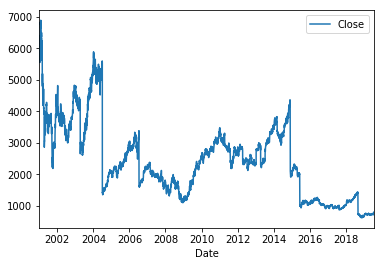

In [15]:
from nsepy import get_history
from datetime import date
data = get_history(symbol="INFY", start=date(2001,1,1), end=date(2019,7,29))
data[['Close']].plot()

In [16]:
data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2001-01-01,INFOSYSTCH,EQ,5694.10,5705.00,5799.90,5560.00,5600.00,5593.60,5695.70,937207,5.338051e+14,NaN,NaN,NaN
2001-01-02,INFOSYSTCH,EQ,5593.60,5601.00,5730.00,5500.00,5701.00,5680.85,5582.53,1074498,5.998420e+14,NaN,NaN,NaN
2001-01-03,INFOSYSTCH,EQ,5680.85,5600.00,5650.00,5483.70,5605.00,5614.30,5577.17,1001968,5.588146e+14,NaN,NaN,NaN
2001-01-04,INFOSYSTCH,EQ,5614.30,5630.00,6190.00,5630.00,6098.00,6101.35,6084.84,1112390,6.768714e+14,NaN,NaN,NaN
2001-01-05,INFOSYSTCH,EQ,6101.35,6099.00,6399.00,6058.00,6374.90,6381.40,6240.78,1061592,6.625161e+14,NaN,NaN,NaN
2001-01-08,INFOSYSTCH,EQ,6381.40,6312.00,6345.00,5931.00,5975.00,5984.65,6140.68,1191086,7.314078e+14,NaN,NaN,NaN
2001-01-09,INFOSYSTCH,EQ,5984.65,5936.00,6075.00,5836.20,5909.00,5927.90,5953.61,1013641,6.034820e+14,NaN,NaN,NaN
2001-01-10,INFOSYSTCH,EQ,5927.90,6000.10,6028.70,5632.15,5650.00,5666.10,5792.47,1430474,8.285976e+14,NaN,NaN,NaN
2001-01-11,INFOSYSTCH,EQ,5666.10,5675.00,5740.00,5523.00,5528.80,5548.35,5632.68,1069415,6.023673e+14,NaN,NaN,NaN
